# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [119]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import skimage.io
import scipy
import scipy.signal
from pathlib import Path
%matplotlib inline

### Reading the Mosaic Image

In [45]:
IMG_DIR = 'images'
IMG_NAME = 'crayons.bmp'

In [46]:
def read_image(IMG_NAME):
    # build path relative to current notebook
    img_path = Path() / IMG_DIR / IMG_NAME
    return skimage.io.imread(img_path)

In [47]:
mosaic_img = read_image(IMG_NAME)

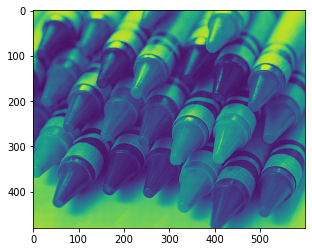

In [48]:
plt.imshow(mosaic_img)

### Linear Interpolation

In [31]:
### HINT : You might want to use filters

[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]


In [ ]:
### HINT : To use filters you might want to write your kernels

In [ ]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [ ]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [202]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    print(mosaic_shape)

    # upsampling ratio
    L = 2

    # build a triangle kernel by convolve two linear box filters
    h = (1/2) * np.convolve(np.ones((L, )), np.ones((L, )))
    h = h.reshape(h.shape[0], -1)
    h_bi = h.T * h
    print(h_bi)
    
    # split colors
    #    R   G_1
    #   G_2   B
    im = np.zeros(mosaic_img.shape + (3, ))
    
    # R
    im[::2, ::2, 0] = mosaic_img[::2, ::2]
    # G1/2
    im[::2, 1::2, 1] = mosaic_img[::2, 1::2]
    im[1::2, ::2, 1] = mosaic_img[1::2, ::2]
    # B
    im[1::2, 1::2, 2] = mosaic_img[1::2, 1::2]

    
    rb_filt = [
        [0.25, 0.5,  0.25],
        [0.5,  1,   0.5 ],
        [0.25, 0.5,  0.25]
    ]
    g_filt = [
        [0, 0.25, 0],
        [0.25, 1, 0.25], 
        [0, 0.25, 0]
    ]

    im_r = scipy.signal.convolve2d(im[..., 0], rb_filt, mode='same', boundary='fill', fillvalue=0)
    
    im_g = scipy.signal.convolve2d(im[..., 1], g_filt, mode='same', boundary='fill', fillvalue=0)
    im_b = scipy.signal.convolve2d(im[..., 2], rb_filt, mode='same', boundary='fill', fillvalue=0)

    print(im_r)

    im_de = np.stack([im_r, im_g, im_b], axis=-1)
    plt.imshow(im_de)
    '''
    plt.subplot(1, 2, 1)
    plt.imshow(im[..., 0])
    plt.subplot(1, 2, 2)
    plt.imshow(im_r)

    print(im_r.shape)
    '''
    '''
    plt.subplot(1, 3, 1)
    plt.imshow(im[..., 0])
    plt.subplot(1, 3, 2)
    plt.imshow(im[..., 1])
    plt.subplot(1, 3, 3)
    plt.imshow(im[..., 2])
    '''
    
    ### YOUR CODE HERE ###
    return soln_image

In [203]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_solution_image(mosaic_img)

skimage.io.imsave('_test.png', soln_image)

(480, 600)
[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]
[[  0. 222.   0. 219.]
 [225.   0. 219.   0.]
 [  0. 221.   0. 217.]
 [223.   0. 217.   0.]]
[[111.75 222.   165.   219.  ]
 [225.   221.75 219.   218.25]
 [167.25 221.   218.5  217.  ]
 [223.   220.   217.   215.75]]


RuntimeError: 

In [ ]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    err = np.abs(soln_image - original_image)

    # preview error map
    plt.imshow(err)

    return np.mean(err), np.max(err)

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(480, 600)
[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]
[[479.25 315.75 312.   ... 336.   336.   168.  ]
 [320.25 211.25 209.   ... 222.75 222.5  111.25]
 [321.   212.   210.   ... 221.5  221.   110.5 ]
 ...
 [276.   184.   184.   ... 182.75 183.    91.5 ]
 [276.   184.   184.   ... 183.   183.    91.5 ]
 [138.    92.    92.   ...  91.5   91.5   45.75]]


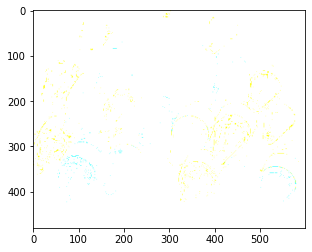

In [ ]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The average per-pixel error for crayons is: 94.39974189814815
The maximum per-pixel error for crayons is: 255.0


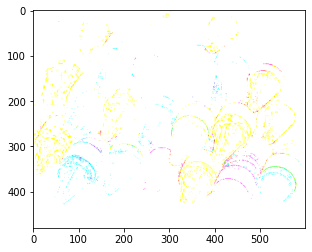

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(1440, 2382)
[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[258.75 171.75 171.   ... 171.75 172.5   86.25]
 [171.   114.25 114.5  ... 115.   115.    57.5 ]
 [169.5  114.   115.   ... 115.5  115.    57.5 ]
 ...
 [ 36.75  27.25  30.   ...   1.     1.     0.5 ]
 [ 31.5   23.5   26.   ...   2.     2.     1.  ]
 [ 15.75  11.75  13.   ...   1.     1.     0.5 ]]


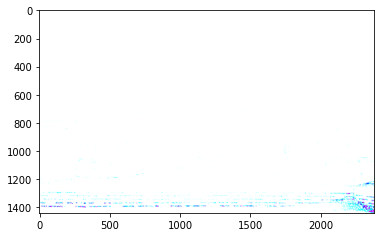

In [ ]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The average per-pixel error for iceberg is: 105.40679663448083
The maximum per-pixel error for iceberg is: 255.0


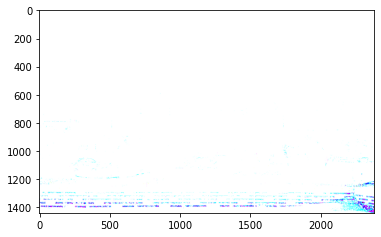

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

(800, 1200)
[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[373.5  249.75 250.5  ... 216.   216.   108.  ]
 [271.5  181.5  182.   ... 138.   138.    69.  ]
 [294.   196.5  197.   ... 132.   132.    66.  ]
 ...
 [310.5  211.   215.   ... 217.   217.   108.5 ]
 [318.   216.   220.   ... 217.   217.   108.5 ]
 [159.   108.   110.   ... 108.5  108.5   54.25]]


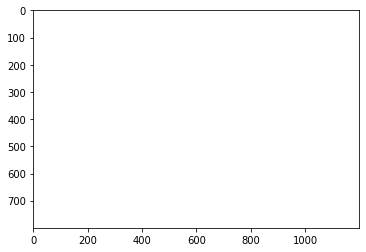

In [ ]:
mosaic_img = read_image('tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The average per-pixel error for tony is: 146.75829479166666
The maximum per-pixel error for tony is: 255.0


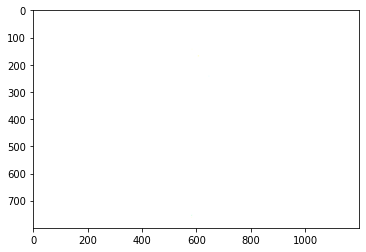

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(724, 970)
[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]
[[ 94.5   76.5   90.   ... 187.5  189.    94.5 ]
 [ 66.    52.25  60.5  ... 123.75 124.    62.  ]
 [ 69.    53.5   61.   ... 122.5  122.    61.  ]
 ...
 [  3.75   8.75  15.   ...  54.    53.5   26.75]
 [  3.    10.5   19.   ...  54.5   53.    26.5 ]
 [  1.5    5.25   9.5  ...  27.25  26.5   13.25]]


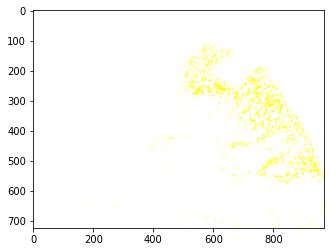

In [ ]:
mosaic_img = read_image('hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [ ]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    return freeman_soln_image

In [ ]:
mosaic_img = read_image('tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE

NameError: name 'freeman_soln_image' is not defined

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [ ]:
### Feel free to play around with other images for Freeman's method above ###

In [ ]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [ ]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    return mosaic_img

In [ ]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

In [ ]:
### YOUR CODE HERE ###

### Bonus Points

In [ ]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####